<a href="https://colab.research.google.com/github/delicate99/Python_ML/blob/main/06_BayesClassifier_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spamdata 

In [1]:
!wget --output-document=SpamData.zip "https://github.com/delicate99/Python_ML/blob/main/SpamData.zip?raw=true"

--2021-01-18 01:42:45--  https://github.com/delicate99/Python_ML/blob/main/SpamData.zip?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/delicate99/Python_ML/raw/main/SpamData.zip [following]
--2021-01-18 01:42:45--  https://github.com/delicate99/Python_ML/raw/main/SpamData.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/delicate99/Python_ML/main/SpamData.zip [following]
--2021-01-18 01:42:45--  https://raw.githubusercontent.com/delicate99/Python_ML/main/SpamData.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

In [2]:
import zipfile
from os import walk
from os.path import join
import os.path
import pandas as pd
import matplotlib.pyplot as plt




In [3]:
fname = "SpamData.zip"
if os.path.isfile(fname):
  with zipfile.ZipFile(fname,'r') as zip_file:
    zip_file.extractall('')
  print('Extraction Finished....')

Extraction Finished....


In [4]:
%cd SpamData
!pwd

/content/SpamData
/content/SpamData


In [5]:
%cd 01_Processing

/content/SpamData/01_Processing


In [6]:
!ls

email-text-data.json  spam_assassin_corpus  wordcloud_resources
practice_email.txt    word-by-id.csv


## Contents path

In [7]:
Example_file = 'practice_email.txt'
SPAM_1_PATH = 'spam_assassin_corpus/spam_1'
SPAM_2_PATH = 'spam_assassin_corpus/spam_2'
EASY_NONSPAM_1_PATH = 'spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'spam_assassin_corpus/easy_ham_2'

SPAM_CAT = 1
HAM_CAT = 0

DATA_JSON_FILE = 'email-text-data.json'

In [8]:
stream = open(Example_file, encoding ='latin-1')
message = stream.read()
stream.close
print(type(message))
print(message)

<class 'str'>
From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: fro

In [9]:
stream = open(Example_file, encoding ='latin-1')

is_body = False
lines = []

for line in stream :
    if is_body :
        lines.append(line)
    elif line == '\n':
        is_body = True

email_body = '\n'.join(lines)
print(email_body)




stream.close




Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

<function TextIOWrapper.close>

In [10]:
print(lines)

['\n', 'Dear Mr Still\n', '\n', 'Good tidings to you and all your staff for the festive season ahead (Christmas).\n', 'Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa\'s Grotto" in your store.\n', 'But WAIT! You\'re probably thinking: "What makes him so special?"\n', 'Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.\n', 'You will note also, from the enclosed sketch, that I have radically redesigned Santa\'s outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.\n', 'I look forward to hearing from you.\n', '\n', 'Best wishes\n', 'Robin C

### Generator Function




In [11]:
def generator_squres(N):
    for my_number in range(N):
        yield my_number**2

for i in generator_squres(5):
    print(i, end ='->')

0->1->4->9->16->

In [12]:
def email_body_generator(path):
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding ='latin-1')    
            is_body = False
            lines = []  
            for line in stream :
                if is_body :
                    lines.append(line)
                elif line == '\n':
                    is_body = True

            email_body = '\n'.join(lines)
            yield file_name, email_body


        

In [13]:
def df_from_directory(path, classification):
    rows =[]
    row_names = []
    for file_name, email_body in email_body_generator(path):
        rows.append({'MESSAGE':email_body, 'CATEGORY': classification})
        row_names.append(file_name)
    return pd.DataFrame(rows, index = row_names)

In [14]:
spam_emails = df_from_directory(SPAM_1_PATH, 1)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH,1))
spam_emails.head()


,MESSAGE,CATEGORY
00090.52630c4c07cd069c7bc7658c1a7a7253,This is a multi-part message in MIME format.\n...,1
00314.8f7993db02bde4d724e1eff9d2d35db1,<html><head><title>::FREE MORTGAGE QUOTE::</ti...,1
00013.d3f0b591a65f116ea5d9d4ad919f83aa,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00045.7282c2c4e009744f2f3450d370009235,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00218.917ed95f5c90c1d9d15d2528b0bd1e79,"Dear Partner to be,\n\n\n\nFirst, I must apolo...",1


In [15]:
spam_emails.shape

(1898, 2)

In [16]:
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))

In [17]:
ham_emails.head()
ham_emails.shape


(3901, 2)

In [18]:
data = pd.concat([spam_emails, ham_emails])
print('Shape of entire dataframe is', data.shape)

Shape of entire dataframe is (5799, 2)


In [19]:
data.tail()

,MESSAGE,CATEGORY
00470.31854a1dce26d60c524ac8051bd00068,"On Tue, Aug 20, 2002 at 12:06:18PM +0100, Phil...",0
00741.69c01dfaf0584817f92435ebd0e7c8c3,--==_Exmh_49691723P\n\nContent-Type: text/plai...,0
00705.7ff90bba3250a39362816997bbd728ef,Yes - I was going to suggest the folder change...,0
00843.b26541d28a2a01ed3f2e9e5597ea321d,funny load message:\n\nmoo!moo!moo!moo!moo!moo...,0
00515.b39512509fd4f39fb1cf50248c37564f,"On Mon, 19 Aug 2002 12:01:02 BST, Adrian Murph...",0


## Data Cleaning : Checking for Missing Values

In [20]:
data["MESSAGE"].isnull().values.any()

False

In [21]:
# checking if there are empty emails : string length zero
(data.MESSAGE.str.len() == 0).any()

True

In [22]:
(data.MESSAGE.str.len() == 0).sum()

3

In [23]:
data.MESSAGE.isnull().sum()

0

## Locate empty values

In [24]:
type(data.MESSAGE.str.len() ==0)

pandas.core.series.Series

In [25]:
data[data.MESSAGE.str.len() ==0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [26]:
#data.index.get_loc(".DS_Store") 

## Remove system file entiries from the datafames

In [27]:
data.drop(['cmds'], inplace= True)
data.shape

(5796, 2)

## Add Document IDs to Track Emails in Datasets

In [28]:
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids
data.DOC_ID

00090.52630c4c07cd069c7bc7658c1a7a7253       0
00314.8f7993db02bde4d724e1eff9d2d35db1       1
00013.d3f0b591a65f116ea5d9d4ad919f83aa       2
00045.7282c2c4e009744f2f3450d370009235       3
00218.917ed95f5c90c1d9d15d2528b0bd1e79       4
                                          ... 
00470.31854a1dce26d60c524ac8051bd00068    5791
00741.69c01dfaf0584817f92435ebd0e7c8c3    5792
00705.7ff90bba3250a39362816997bbd728ef    5793
00843.b26541d28a2a01ed3f2e9e5597ea321d    5794
00515.b39512509fd4f39fb1cf50248c37564f    5795
Name: DOC_ID, Length: 5796, dtype: int64

In [29]:
data['FILE_NAME'] = data.index


data.set_index(['DOC_ID'], inplace =True)


In [30]:
data.head()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,This is a multi-part message in MIME format.\n...,1,00090.52630c4c07cd069c7bc7658c1a7a7253
1,<html><head><title>::FREE MORTGAGE QUOTE::</ti...,1,00314.8f7993db02bde4d724e1eff9d2d35db1
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00013.d3f0b591a65f116ea5d9d4ad919f83aa
3,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00045.7282c2c4e009744f2f3450d370009235
4,"Dear Partner to be,\n\n\n\nFirst, I must apolo...",1,00218.917ed95f5c90c1d9d15d2528b0bd1e79


In [31]:
import json

with open('email-text-data.json', 'w') as outfile:
    json.dump('data', outfile)

In [32]:
!pwd

/content/SpamData/01_Processing


##Save file using Pandas

In [33]:
data.to_json(DATA_JSON_FILE)

## Number of spam mail visualization (Pie chart)

In [34]:
data.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [35]:
amout_of_spam = data.CATEGORY.value_counts()[1]
amout_of_ham = data.CATEGORY.value_counts()[0]

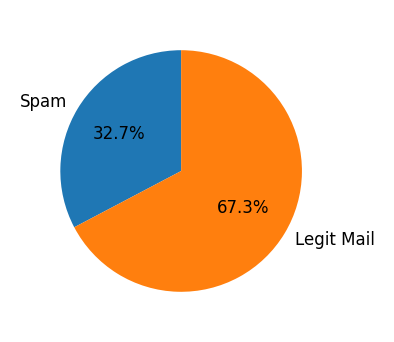

In [36]:
category = ['Spam', 'Legit Mail']
sizes = [amout_of_spam, amout_of_ham]

plt.figure( figsize =(2,2), dpi =200)
plt.pie(sizes, labels = category, textprops ={'fontsize': 6},startangle =90,
    autopct = '%1.1f%%')
plt.show()

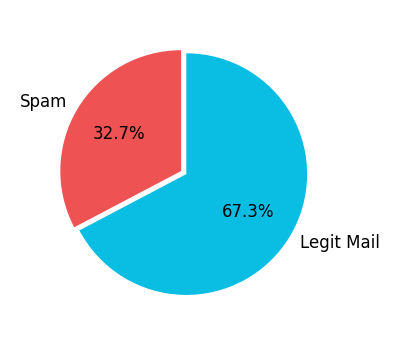

In [37]:
category = ['Spam', 'Legit Mail']
sizes = [amout_of_spam, amout_of_ham]
coustom_colors = ['#ee5253','#0abde3']

plt.figure( figsize =(2,2), dpi =200)
plt.pie(sizes, labels = category, textprops ={'fontsize': 6},startangle =90,
    autopct = '%1.1f%%', colors = coustom_colors, explode =[0,0.05])
plt.show()

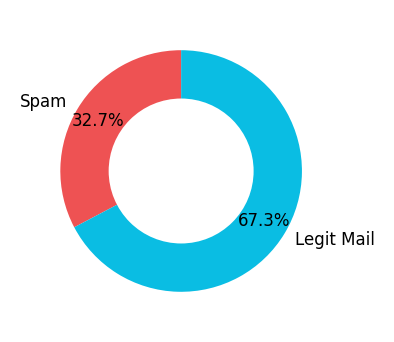

In [38]:
category = ['Spam', 'Legit Mail']
sizes = [amout_of_spam, amout_of_ham]
coustom_colors = ['#ee5253','#0abde3']

plt.figure( figsize =(2,2), dpi =200)
plt.pie(sizes, labels = category, textprops ={'fontsize': 6},startangle =90,
    autopct = '%1.1f%%', colors = coustom_colors, pctdistance = 0.8)

# draw circle
center_circle = plt.Circle((0,0), radius = 0.6, fc ='white')
plt.gca().add_artist(center_circle)



plt.show()

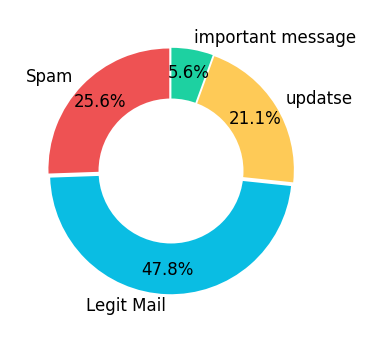

In [39]:
category = ['Spam', 'Legit Mail', 'updatse','important message']
sizes = [23,43,19,5]
coustom_colors = ['#ee5253','#0abde3','#feca57','#1dd1a1']
offset =[0.02, 0.02, 0.02, 0.02]

plt.figure( figsize =(2,2), dpi =200)
plt.pie(sizes, labels = category, textprops ={'fontsize': 6},startangle =90,
    autopct = '%1.1f%%', colors = coustom_colors, pctdistance = 0.8, explode=offset)

# draw circle
center_circle = plt.Circle((0,0), radius = 0.6, fc ='white')
plt.gca().add_artist(center_circle)



plt.show()

# Natural Language Precessing

### text pre precessing :
 lower, tokenize, remove stop words,
 strip HTML tag, word stemming, remove   punctuation

In [40]:
#convert to lower

msg ='All work and no play makes Jack a dull boy'
msg.lower()

'all work and no play makes jack a dull boy'

### Natural Language Tool Kits

In [41]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup

In [42]:
!pip install nltk

### Tokenizing and remove stop words

In [43]:
!pip install WordCloud

nltk.download('stopwords')
# nltk.download('wordnet')
nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger') 
nltk.download('gutenberg')
nltk.download('shakespeare')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package shakespeare to /root/nltk_data...
[nltk_data]   Unzipping corpora/shakespeare.zip.


True

In [44]:
!ls

email-text-data.json  spam_assassin_corpus  wordcloud_resources
practice_email.txt    word-by-id.csv


In [45]:
msg='All work and no play makes Jack a dull boy'
word_tokenize(msg.lower())

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy']

In [46]:
stop_words= set(stopwords.words('english'))

In [47]:
if 'this' in stop_words : print('Find it')

Find it


In [48]:
if 'hello' not in stop_words : print("Nope")

Nope


In [49]:
msg = 'All work and no play makes Jack a dull boy. To be or not to be.'
words =word_tokenize(msg.lower())

filtered_words =[]
for word in words :
    if word not in stop_words :
        filtered_words.append(word)

print(filtered_words)

['work', 'play', 'makes', 'jack', 'dull', 'boy', '.', '.']


### Word stemming

In [50]:
msg = 'All work and no play makes Jack a dull boy. To be or not to be.\
       Nobody expects the Spanish Inquisition'

words =word_tokenize(msg.lower())

# stemmer = PorterStemmer()
stemmer = SnowballStemmer('english')
filtered_words =[]
for word in words :
    if word not in stop_words :
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', '.', '.', 'nobodi', 'expect', 'spanish', 'inquisit']


### Removing Puctuation

In [51]:
msg = 'All work and no play makes Jack a dull boy. To be or not to be.??\
       Nobody expects the Spanish Inquisition!'

words =word_tokenize(msg.lower())

# stemmer = PorterStemmer()
stemmer = SnowballStemmer('english')
filtered_words =[]
for word in words :
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', 'nobodi', 'expect', 'spanish', 'inquisit']


In [52]:
'p'.isalpha()

True

### Removing HTML Tag

In [53]:
data.at[2, 'MESSAGE']
soup = BeautifulSoup(data.at[2, 'MESSAGE'], 'html.parser')
#print(soup.prettify())

In [54]:
soup.get_text()

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417\n\n\n"

In [55]:
def clean_message(message, stemmer = PorterStemmer(),
                  stop_words=set(stopwords.words('english'))):
    
    words = word_tokenize(message.lower())
    filtered_words =[]

    for word in words :
        if word not in stop_words and word.isalpha():
           filtered_words.append(stemmer.stem(word))
 
    return filtered_words

    

In [56]:
clean_message(email_body)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [57]:
def clean_msg_no_html(message, stemmer = PorterStemmer(),
                  stop_words=set(stopwords.words('english'))):
    
    soup = BeautifulSoup(message, 'html.parser')
    clean_text = soup.get_text()
    
    words = word_tokenize(clean_text.lower())
    filtered_words =[]

    for word in words :
        if word not in stop_words and word.isalpha():
           filtered_words.append(stemmer.stem(word))
           #filtered_words.append(word)
    return filtered_words


In [58]:
clean_msg_no_html(data.at[2,'MESSAGE'])

['fight',
 'risk',
 'cancer',
 'http',
 'slim',
 'guarante',
 'lose',
 'lb',
 'day',
 'http',
 'get',
 'child',
 'support',
 'deserv',
 'free',
 'legal',
 'advic',
 'http',
 'join',
 'web',
 'fastest',
 'grow',
 'singl',
 'commun',
 'http',
 'start',
 'privat',
 'photo',
 'album',
 'onlin',
 'http',
 'wonder',
 'day',
 'offer',
 'manag',
 'prizemama',
 'wish',
 'leav',
 'list',
 'pleas',
 'use',
 'link',
 'http',
 'zzzz']

## Apply Cleaning and Tokenize to all massages

#### Slicing Dataframe and Series & Creating subsets

In [59]:
data.iat[2,2] # single entry

'00013.d3f0b591a65f116ea5d9d4ad919f83aa'

In [60]:
data.iloc[0:5] # 첫번째부터 다섯번째까지 모든 row

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,This is a multi-part message in MIME format.\n...,1,00090.52630c4c07cd069c7bc7658c1a7a7253
1,<html><head><title>::FREE MORTGAGE QUOTE::</ti...,1,00314.8f7993db02bde4d724e1eff9d2d35db1
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00013.d3f0b591a65f116ea5d9d4ad919f83aa
3,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00045.7282c2c4e009744f2f3450d370009235
4,"Dear Partner to be,\n\n\n\nFirst, I must apolo...",1,00218.917ed95f5c90c1d9d15d2528b0bd1e79


In [61]:
data.iloc[0:2, 0]
data.loc[0:2, 'MESSAGE']
data.MESSAGE.iloc[0:2]
data["MESSAGE"].iloc[0:2]

# all are same results

DOC_ID
0    This is a multi-part message in MIME format.\n...
1    <html><head><title>::FREE MORTGAGE QUOTE::</ti...
Name: MESSAGE, dtype: object

In [62]:
first_emails = data["MESSAGE"].iloc[0:3]
nested_list = first_emails.apply(clean_message) # type = Series

In [63]:
#  flat_list=[]
# for sublist in nested_list :
#     for item in sublist :
#         flat_list.append(item)

flat_list =[item for sublist in nested_list for item in sublist]

len(flat_list)

372

In [64]:
%%time

nested_list = data.MESSAGE.apply(clean_msg_no_html)

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


CPU times: user 29.6 s, sys: 46.9 ms, total: 29.7 s
Wall time: 29.7 s


In [65]:
nested_list.head()

DOC_ID
0    [messag, mime, format, get, kick, huge, annuit...
1                  [mortgag, quot, remov, list, click]
2    [fight, risk, cancer, http, slim, guarante, lo...
3    [fight, risk, cancer, http, slim, guarante, lo...
4    [dear, partner, first, must, apologis, use, me...
Name: MESSAGE, dtype: object

#### Using logics to Slice Dataframes

In [66]:
data[data.CATEGORY == 1].shape

(1896, 3)

In [67]:
doc_ids_spam = data[data.CATEGORY == 1].index
doc_ids_ham = data[data.CATEGORY == 0].index
type(doc_ids_ham)
#len(doc_ids_ham)

pandas.core.indexes.numeric.Int64Index

#### Subsetting a Series with an index

In [68]:
nested_list_ham = nested_list.loc[data[data.CATEGORY == 0].index]
type(nested_list_ham )
nested_list_ham.shape

(3900,)

In [69]:
nested_list_spam = nested_list.loc[doc_ids_spam]
nested_list_spam.shape

(1896,)

In [70]:
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
normal_words = pd.Series(flat_list_ham).value_counts()
normal_words.shape
#len(flat_list_ham)


(20744,)

In [71]:
normal_words[:10]

http      7561
use       3630
list      2878
one       2371
get       2284
mail      2255
would     2003
like      1928
messag    1847
work      1798
dtype: int64

In [72]:
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spammy_words = pd.Series(flat_list_spam).value_counts()
spammy_words.shape

(13280,)

In [73]:
spammy_words[:10]

http      3101
email     3094
free      2555
click     2058
receiv    1987
list      1974
get       1903
pleas     1842
busi      1792
order     1743
dtype: int64

## Creating Word Cloud

In [74]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

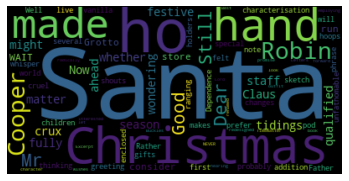

In [75]:
word_cloud = WordCloud().generate(email_body)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [76]:
example_corpus = nltk.corpus.gutenberg.words('melville-moby_dick.txt')

In [77]:
len(example_corpus)
example_corpus

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...]

In [78]:
type(example_corpus)

nltk.corpus.reader.util.StreamBackedCorpusView

In [79]:
word_list = [''.join(word) for word in example_corpus]
novel_as_string = ' '.join(word_list)

In [80]:
type(word_list)

list

In [81]:
WHALE_FILE ='wordcloud_resources/whale-icon.png'
SKULL_FILE ='wordcloud_resources/skull-icon.png'
THUMBS_UP_FILE = 'wordcloud_resources/thumbs-up.png'
THUMBS_DOWN_FILE = 'wordcloud_resources/thumbs-down.png'

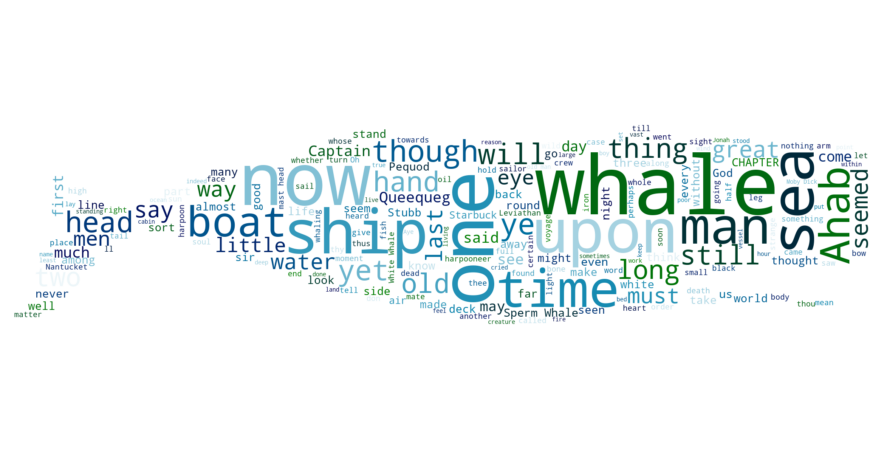

In [82]:
icon = Image.open(WHALE_FILE)
image_mask = Image.new(mode='RGB',size=icon.size, color=(255,255,255))
image_mask.paste(icon, box=icon)
rgb_array = np.array(image_mask)  # Convert image_mask to array



word_cloud = WordCloud(mask=rgb_array,background_color='white', max_words= 200,
                       colormap ='ocean')
word_cloud.generate(novel_as_string)

plt.figure(figsize=(16,8))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [83]:
!pwd

/content/SpamData/01_Processing


In [84]:
Shakespeare =nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
sha_list =[''.join(word) for word in Shakespeare]
hamlet_as_string = ' '.join(sha_list)

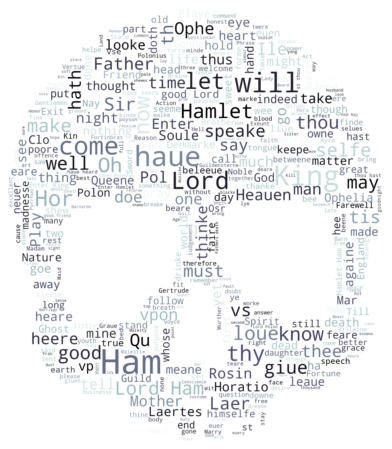

In [85]:
skull_icon = Image.open(SKULL_FILE)
image_mask = Image.new(mode='RGB',size=skull_icon.size, color=(255,255,255))
image_mask.paste(skull_icon, box=skull_icon)
rgb_array = np.array(image_mask)  # Convert image_mask to array



word_cloud = WordCloud(mask=rgb_array,background_color='white', max_words= 400,
                       colormap ='bone')
word_cloud.generate(hamlet_as_string)

plt.figure(figsize=(8,8))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Cloud of HAM and SPAM email


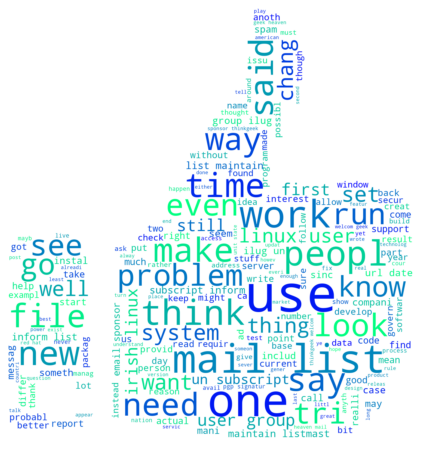

In [86]:
icon = Image.open(THUMBS_UP_FILE)
image_mask = Image.new(mode='RGB',size=icon.size, color=(255,255,255))
image_mask.paste(icon, box=icon)
rgb_array = np.array(image_mask)  # Convert image_mask to array

# generate ham email as string

ham_str = ' '.join(flat_list_ham)

word_cloud = WordCloud(mask=rgb_array,background_color='white', max_words= 200,
                       colormap ='winter')
word_cloud.generate(ham_str)

plt.figure(figsize=(8,8))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

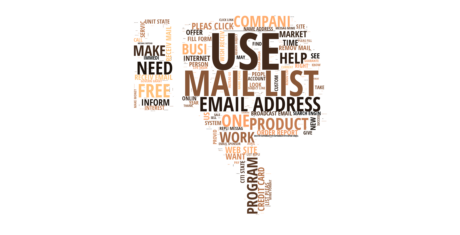

In [87]:
icon = Image.open(THUMBS_DOWN_FILE)
image_mask = Image.new(mode='RGB',size=icon.size, color=(255,255,255))
image_mask.paste(icon, box=icon)
rgb_array = np.array(image_mask)  # Convert image_mask to array

# generate ham email as string

spam_str = ' '.join(flat_list_spam)

word_cloud = WordCloud(mask=rgb_array,background_color='white', max_words=300,
                       colormap ='copper', max_font_size=300,
                       font_path = 'wordcloud_resources/OpenSansCondensed-Bold.ttf')
word_cloud.generate(spam_str.upper())

plt.figure(figsize=(8,8))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Generate Vocabulary and Dictionary

In [88]:
stemmed_nested_list = data.MESSAGE.apply(clean_msg_no_html)
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [89]:
unique_word =pd.Series(flat_stemmed_list).value_counts()
print('Nr.of Unique word:', unique_word.shape[0])
unique_word.head()

Nr.of Unique word: 27294


http     10662
use       5017
list      4852
email     4370
get       4187
dtype: int64

In [90]:
VOCAB_SIZE =2500
frequent_words = unique_word[0:VOCAB_SIZE]
frequent_words[:10]

http     10662
use       5017
list      4852
email     4370
get       4187
mail      3985
one       3905
free      3171
time      3090
work      2880
dtype: int64

In [91]:
type(frequent_words)

pandas.core.series.Series

### Creating Vocabulary Dataframe with a word ID

In [92]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD':frequent_words.index.values}, index=word_ids)
vocab.index.name = "word_ID"

In [93]:
vocab.head()

,VOCAB_WORD
word_ID,
0,http
1,use
2,list
3,email
4,get


### Save the Vocabulary as a CSV file

In [94]:
WORD_ID_FILE = 'word-by-id.csv'


In [95]:
vocab.to_csv(WORD_ID_FILE, index_label= vocab.index.name, header = vocab.VOCAB_WORD.name)

### Checking a word in the vocabulary

In [96]:
#vocab.VOCAB_WORD =='machine'
any(vocab.VOCAB_WORD =='free')

True

In [97]:
'data' in set (vocab.VOCAB_WORD)


True

### Find the email with the most number of words


In [98]:
clean_email_lengths =[]
for sublist in stemmed_nested_list:
    clean_email_lengths.append(len(sublist))

In [99]:
clean_email_lengths = [len(sublist) for sublist in stemmed_nested_list]
max(clean_email_lengths)

7661

In [100]:
np.argmax(clean_email_lengths) # position of longest email in the list(dataframe)

4427

In [101]:
#stemmed_nested_list[np.argmax(clean_email_lengths)]

In [102]:
data.at[np.argmax(clean_email_lengths), 'MESSAGE']

'------------------------ Yahoo! Groups Sponsor ---------------------~-->\n\n4 DVDs Free +s&p Join Now\n\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM\n\n---------------------------------------------------------------------~->\n\n\n\nA new version of unison is now available for testing.  It incorporates\n\nseveral small improvements over 2.9.1, but the main change is a fix to\n\na bug that had potentially serious safety consequences, but only for\n\nthe very small number of users that are in the habit of running more\n\nthan one instance of Unison at a time, in parallel.  These users are\n\nstrongly encouraged to upgrade.  Others can wait if they wish.\n\n\n\nThe release includes pre-built executables for Linux and Solaris, but\n\nnot Windows.  (We are looking for a Unison-Windows maintainer -- at\n\nthe moment, none of the active developers are regularly using Unison\n\non Windows, and we do not have a machine that is configured properly\n\nfor building executables for exp

## Generate Features and Sparse matrix
#### Creating a DataFrame with onw word per column

In [103]:
type(stemmed_nested_list)

pandas.core.series.Series

In [104]:
type(stemmed_nested_list.tolist())


list

In [105]:
word_columns_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7621,7622,7623,7624,7625,7626,7627,7628,7629,7630,7631,7632,7633,7634,7635,7636,7637,7638,7639,7640,7641,7642,7643,7644,7645,7646,7647,7648,7649,7650,7651,7652,7653,7654,7655,7656,7657,7658,7659,7660
0,messag,mime,format,get,kick,huge,annuiti,bonus,earn,cash,everi,annuiti,four,top,deadlin,soon,problem,earn,cash,everi,annuiti,four,top,get,bonu,call,market,today,pleas,fill,form,inform,name,phone,citi,state,award,market,paid,issu,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,mortgag,quot,remov,list,click,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,get,child,support,deserv,free,legal,advic,http,join,web,fastest,grow,singl,commun,http,start,privat,photo,album,onlin,http,wonder,day,offer,manag,prizemama,wish,leav,list,pleas,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,get,child,support,deserv,free,legal,advic,http,join,web,fastest,grow,singl,commun,http,start,privat,photo,album,onlin,http,wonder,day,offer,manag,prizemama,wish,leav,list,pleas,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,dear,partner,first,must,apologis,use,medium,commun,project,highli,place,offici,govern,nigeria,also,found,member,rule,parti,power,peopl,democrat,parti,pdp,committe,niger,delta,develop,corpor,nddc,charg,manag,supervis,disburs,oil,sale,revenu,nigerian,revenu,control,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


### Spliting the data into Training and Testing Dataset

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X=word_columns_df
y= data.CATEGORY
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
X_train.index.name = X_test.index.name= "DOC_ID"
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7621,7622,7623,7624,7625,7626,7627,7628,7629,7630,7631,7632,7633,7634,7635,7636,7637,7638,7639,7640,7641,7642,7643,7644,7645,7646,7647,7648,7649,7650,7651,7652,7653,7654,7655,7656,7657,7658,7659,7660
DOC_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4844,get,hope,career,move,next,stop,hollywood,rememb,madonna,actress,eirikur,wednesday,august,pm,john,evdemon,wrote,keep,finger,cross,exhaust,britney,quit,http,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4727,hello,use,sinc,coupl,day,mandrak,standard,rpm,cdrecord,give,hard,lock,alreadi,burnt,coupl,cd,steph,sat,michael,conri,wrote,hi,run,fairli,intract,problem,wonder,anybodi,could,give,pointer,deal,run,debian,woodi,pentium,iii,ide,base,system,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5022,someon,tell,joke,email,beer,someth,man,drive,countri,drive,past,farm,beauti,pig,fat,healthi,pink,clean,etc,love,pig,get,admir,pig,notic,wooden,leg,farmer,come,say,howdi,passerbi,say,stop,admir,pig,love,pig,woo,farmer,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3504,url,http,date,problem,dealt,chang,student,grant,charit,statu,public,school,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3921,upon,time,jess,wrote,oh,yeah,follow,thread,list,interest,stuff,might,stick,aspel,get,updat,red,hat,may,month,sinc,guess,beta,releas,freez,packag,version,inclus,next,stabl,releas,alreadi,happen,thu,wait,least,red,hat,linux,break,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [109]:
y_train.head()

DOC_ID
4844    0
4727    0
5022    0
3504    0
3921    0
Name: CATEGORY, dtype: int64

### Creating Sparse Matrix for Training dataset

In [110]:
word_index = pd.Index(vocab["VOCAB_WORD"])

In [111]:
type(word_index)

pandas.core.indexes.base.Index

In [112]:
word_index.get_loc('thu')

395

In [113]:
def make_sparse_matrix(df, indexed_words,labels):
    """
     returns Spare matrix as DataFrame
     df : a DataFrame with word in the coulumns with a document id as index id
          (X_train, X-test)
     indexed_word :index word in order by word id
     labels : category as a Series(y_train, y_test)
     """
     
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list =[]
      
    for i in range(nr_rows):
        for j in range(nr_cols):

            word =df.iat[i,j]
            if word  in word_set :
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                item ={"LABEL":category, 'DOC_ID': doc_id,
                       'OCCURENCE':1, "WORD_ID":word_id}
                dict_list.append(item)


    return pd.DataFrame(dict_list)

In [114]:
TRAINING_DATA_FILE='02_Training/train-data.txt'

In [115]:
%%time

sparse_train_df = make_sparse_matrix(X_train, word_index, y_train)

CPU times: user 8min 20s, sys: 403 ms, total: 8min 20s
Wall time: 8min 20s


In [116]:
train_grouped = sparse_train_df.groupby(["DOC_ID","WORD_ID", 'LABEL']).sum()
train_grouped[:5]

OCCURENCE
DOC_ID WORD_ID LABEL           
0      0       1              2
       1       1              2
       2       1              2
       4       1              3
       5       1              3

In [133]:
train_grouped=train_grouped.reset_index()
train_grouped.head()

,index,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,0,0,0,1,2
1,1,0,1,1,2
2,2,0,2,1,2
3,3,0,4,1,3
4,4,0,5,1,3


In [131]:
%cd ..

/content/SpamData


In [132]:
!ls

01_Processing  02_Training  03_Testing


In [134]:
TRAINING_DATA_FILE='./02_Training/train-data.txt'
np.savetxt(TRAINING_DATA_FILE, train_grouped, fmt='%d')

In [137]:
from google.colab import files
files.download('./02_Training/train-data.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
%%time

sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)

CPU times: user 3min 39s, sys: 3.93 s, total: 3min 43s
Wall time: 3min 43s


In [135]:
test_grouped = sparse_test_df.groupby(["DOC_ID","WORD_ID", 'LABEL']).sum().reset_index()

In [136]:
TEST_DATA_FILE='./02_Training/test-data.txt'
np.savetxt(TEST_DATA_FILE, test_grouped,fmt='%d')

In [138]:
from google.colab import files
files.download('./02_Training/test-data.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>